In [121]:
import pickle
fileObject = open('df_rank', 'r')
df_rank = pickle.load(fileObject)
fileObject.close()

### 1. Feature Importance

### 1) Main Categories

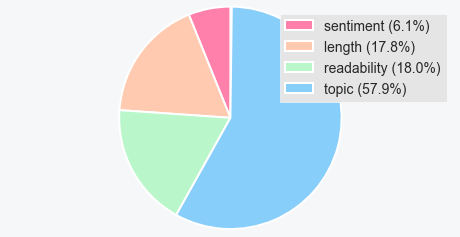

In [864]:
import matplotlib.pyplot as plt

df_rank_ = df_rank.groupby('feature').sum().sort_values('importance', ascending=True)

sizes = df_rank_.values
colors = ['#FF80AB', '#ffcab0', '#B9F6CA', '#87cefa']
explode = (0, 0, 0, 0)  
plt.figure(figsize=(8, 4), facecolor='#f5f7f8')
plt.pie(sizes, explode=explode, colors=colors, shadow=False, startangle=90, wedgeprops = {
        'linewidth' : 2,  
        'ls':'-', 'edgecolor':'white'
    })

plt.axis('equal')
legend_list = []
for i in range(0, 4):
    category = df_rank_['importance'].index[i]
    value = df_rank_['importance'][i]
    label = '{name} ({number}%)'.format(name=category, number=value*100)
    legend_list.append(label)
plt.legend(legend_list, fontsize=14, frameon=True, loc='best' )
plt.show()

### 2) Feature Importance in Detail

In [810]:
df_graph = pd.read_csv('df_rank.csv')
df_graph.drop('Unnamed: 0', axis=1, inplace=True)

In [811]:
data = df_graph.values
column = df_graph.columns
index = ['sentiment', 'length', 'readability', 'topic']
df_graph = pd.DataFrame(data, columns=column, index=index)

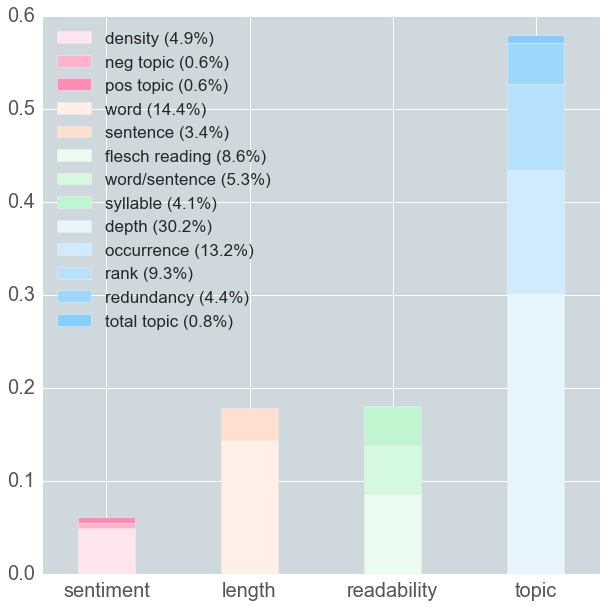

In [1103]:
graph = df_graph.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 10), 
    width=0.4, 
    colors=[
        '#ffe5ee', '#ffb2cc', '#ff8cb3', '#ffefe7', '#ffdfcf', '#eafcef', '#d5f9df', '#c0f6cf', '#e7f5fe', '#cfebfd', '#b7e1fc', '#9fd7fb', '#87cefa'
    ], 
    legend = False,
    rot=0,
    fontsize=20,
)

legend_list = []
sentiment = df_rank[df_rank['feature']=='sentiment'].sort_values('importance', ascending=False)
length = df_rank[df_rank['feature']=='length'].sort_values('importance', ascending=False)
readability = df_rank[df_rank['feature']=='readability'].sort_values('importance', ascending=False)
topic = df_graph.iloc[3, 8:]

for i in range(len(sentiment)):
    category = sentiment['column'].values[i]
    value = sentiment['importance'].values[i]
    label = '{name} ({number}%)'.format(name=category, number=value*100)
    legend_list.append(label)
for i in range(len(length)):
    category = length['column'].values[i]
    value = length['importance'].values[i]
    label = '{name} ({number}%)'.format(name=category, number=value*100)
    legend_list.append(label)
for i in range(len(readability)):
    category = readability['column'].values[i]
    value = readability['importance'].values[i]
    label = '{name} ({number}%)'.format(name=category, number=value*100)
    legend_list.append(label)
for i in range(len((topic))):
    category = topic.index[i]
    value = topic.values[i]
    label = '{name} ({number}%)'.format(name=category, number=value*100)
    legend_list.append(label)

graph.legend(
    legend_list, 
    loc='upper left', 
    fontsize=17
)

graph.set_axis_bgcolor('#CFD8DC');

### 2. Most Influencing Feature: 'Topic'

In [867]:
fileObject = open('preprocessing', 'r')
df_tablet = pickle.load(fileObject)
fileObject.close()

#### 1) How often did topic appear in each sample?

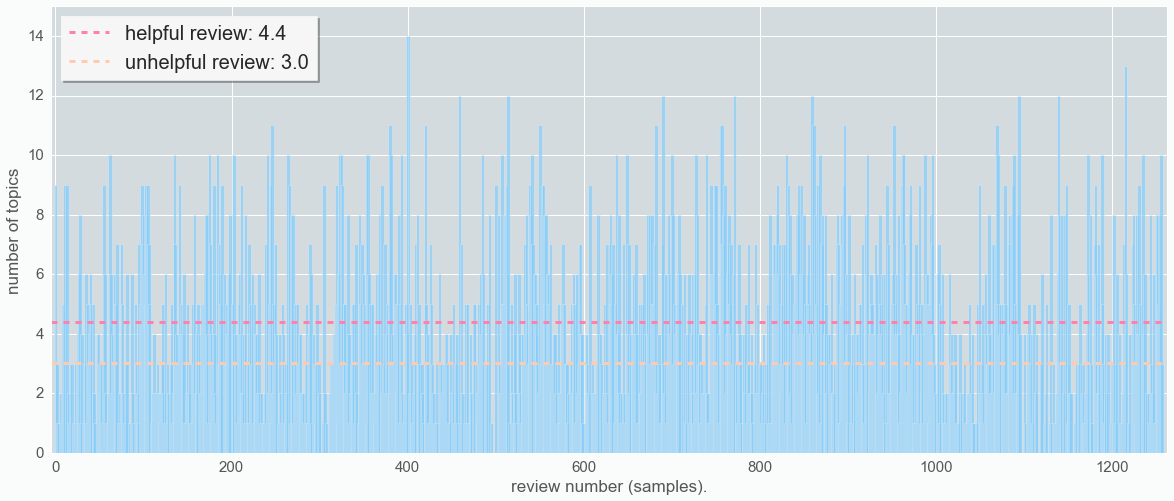

In [1142]:
from matplotlib.pyplot import axvline, axhline

fig = plt.figure(figsize=(20, 8), facecolor='#fafbfb')
ax = fig.add_subplot(111)
ax.patch.set_facecolor('#CFD8DC')
ax.patch.set_alpha(0.9)

plt.xlim(-5, df_tablet['total topic'].count()+5)
plt.ylim(df_tablet['total topic'].min(), df_tablet['total topic'].max()+1)
plt.xlabel('review number (samples).', fontsize=17)
plt.ylabel('number of topics', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

axhline(
    df_tablet[df_tablet['help class']==1]['total topic'].mean(), 
    color='#FF80AB', 
    linewidth=3, 
    linestyle='--', 
    label='helpful review: {value}'.format(value=round(df_tablet[df_tablet['help class']==1]['total topic'].mean(), 1))
)
axhline(
    df_tablet[df_tablet['help class']==0]['total topic'].mean(), 
    color='#ffcab0', 
    linewidth=3, 
    linestyle='--', 
    label='unhelpful review: {value}'.format(value=round(df_tablet[df_tablet['help class']==0]['total topic'].mean(),1))
)

legend = plt.legend(loc='upper left', fontsize=20, shadow=True, frameon=True)
legend.get_frame().set_facecolor('#f6f6f6')

plt.bar(
    height=df_tablet.iloc[:, 21].values, 
    left=np.arange(0, 1257), 
    align='center', 
    width=4,
    color='#87cefa',
    alpha=0.7
    );